### Basic data analysis from GenBank

In [32]:
from os import walk 
from os import path

In [33]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
def get_data_files(directory):
    for root,dirs,files in walk(directory):
        for file in files:
            yield path.join(root,file)

In [36]:
def opengb(file_path):
#Takes a path to a file in gb format. Returns the header and the nucleotide sequence.

    sequence = ''
    with open(file_path, 'rt') as gb:
        for line in gb:
            if line.startswith('ORIGIN'):
                break
        sequence = gb.read().upper()
        remove_digits = str.maketrans('', '', '1234567890 /') 
        sequence = sequence.translate(remove_digits).strip()
    return sequence

In [37]:
df = pd.DataFrame(columns = ['organism', 'sequence'])

In [38]:
for file in get_data_files('./python-in-data-science-data/genomes'):
    organism = path.basename(file).split('.')[0]
    sequence = opengb(file)

    df = df.append({
            'organism' : organism,
            'sequence' : sequence
        },ignore_index=True)

    

In [39]:
def count_TATA(sequence):
    return sequence.count('TATA')

In [40]:
def statistic_ACGT(sequence):
    stat_dict = {}
    
    for nuklein in "ACGT":
        stat_dict[nuklein] = round(sequence.count(nuklein)/len(sequence)*100,2)
    return stat_dict

In [41]:
df['sequence_length'] = df['sequence'].apply(lambda x: len(x))

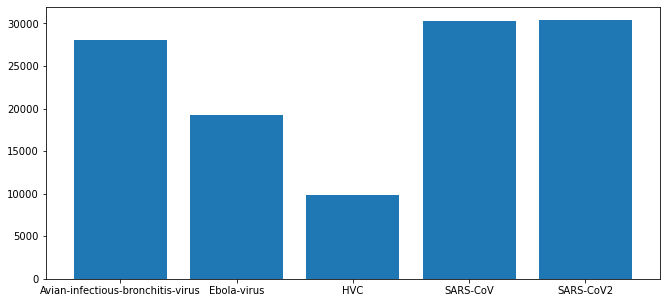

In [42]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['sequence_length'])
plt.show()

In [43]:
df['count_A%'] = df['sequence'].apply(statistic_ACGT).apply(lambda x: x['A'])

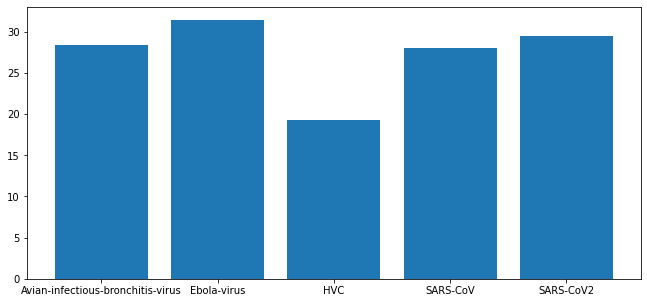

In [44]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_A%'])
plt.show()

In [45]:
df['count_C%'] = df['sequence'].apply(statistic_ACGT).apply(lambda x: x['C'])

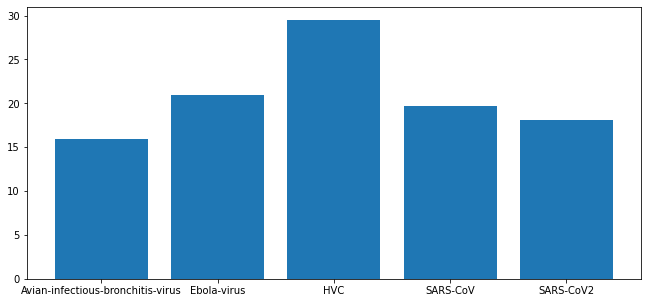

In [46]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_C%'])
plt.show()

In [47]:
df['count_G%'] = df['sequence'].apply(statistic_ACGT).apply(lambda x: x['G'])

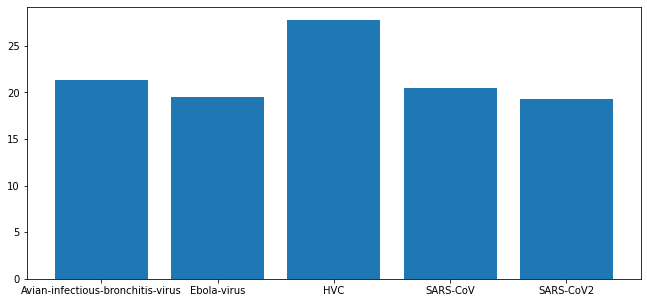

In [48]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_G%'])
plt.show()

In [49]:
df['count_T%'] = df['sequence'].apply(statistic_ACGT).apply(lambda x: x['T'])

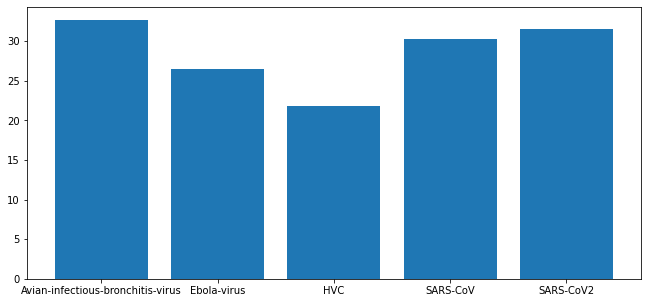

In [50]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_T%'])
plt.show()

In [51]:
df['count_CG%'] = df['count_C%'] + df['count_G%']

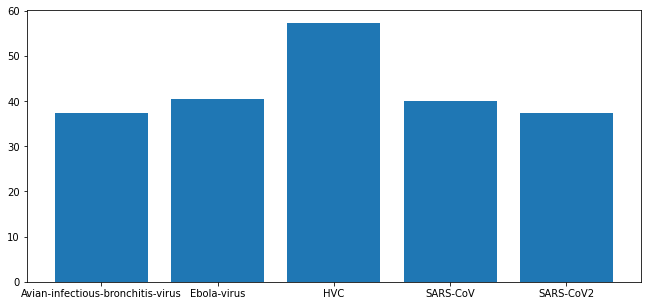

In [52]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_CG%'])
plt.show()

In [53]:
df['count_AT%'] = df['count_A%'] + df['count_T%']

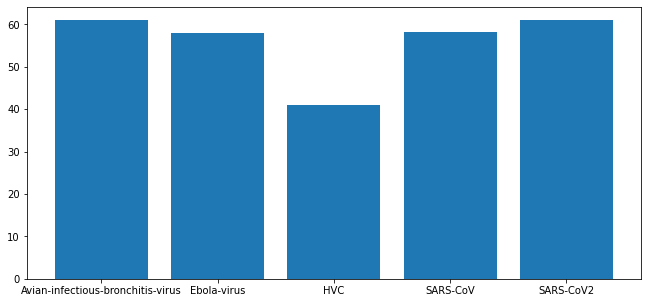

In [54]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_AT%'])
plt.show()

In [55]:
df['count_TATA'] = df['sequence'].apply(count_TATA)

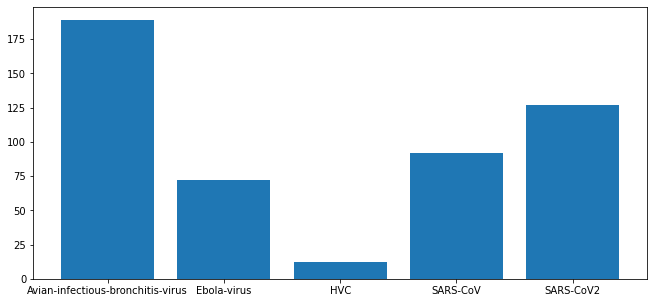

In [56]:
plt.figure(figsize=(11,5))
plt.bar(x=df['organism'], height=df['count_TATA'])
plt.show()

In [57]:
df

,organism,sequence,sequence_length,count_A%,count_C%,count_G%,count_T%,count_CG%,count_AT%,count_TATA
0,Avian-infectious-bronchitis-virus,ACTTAAGATAGATATTAATATATATCTATTACACTAGCCTTGCGCT...,28068,28.38,15.96,21.35,32.67,37.31,61.05,189
1,Ebola-virus,CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCG...,19274,31.45,20.93,19.47,26.52,40.40,57.97,72
2,HVC,GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCT...,9806,19.26,29.50,27.78,21.82,57.28,41.08,12
3,SARS-CoV,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,30246,28.04,19.64,20.46,30.23,40.10,58.27,92
4,SARS-CoV2,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,30401,29.45,18.07,19.29,31.56,37.36,61.01,127
